### Задание 1

Импортируйте библиотеки pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [2]:
boston = load_boston()
data = boston.data
feature_names = boston["feature_names"]
x = pd.DataFrame(data, columns=feature_names)

target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [5]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

lr_sort_check_test = check_test.sort_index()
lr_sort_check_test.head(10)

,y_test,y_pred
0,24.0,30.086496
2,34.7,30.949930
9,18.9,18.530570
11,18.9,21.312405
15,19.9,19.686226
17,17.5,16.862428
18,20.2,16.298337
19,18.2,18.478942
22,15.2,15.604450
23,14.5,13.385941


Как это видно на графике

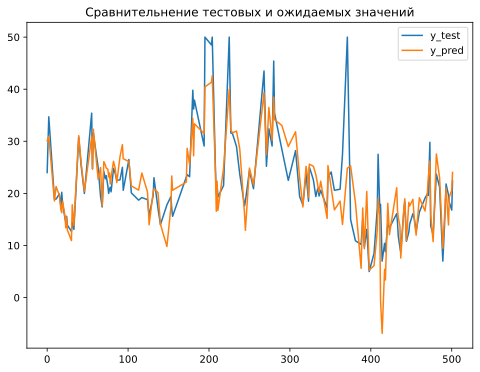

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(lr_sort_check_test.y_test, label='y_test')
ax.plot(lr_sort_check_test.y_pred, label='y_pred')
ax.legend()
ax.set(title='Сравнительнение тестовых и ожидаемых значений');

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7112260057484927

- Cоздайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
- Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
- Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
- Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
- Напишите в комментариях к коду, какая модель в данном случае работает лучше.

Cоздайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

In [8]:
from sklearn.ensemble import RandomForestRegressor

Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [9]:
rfc = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values:, 0, чтобы получить из датафрейма одномерный массив Numpy,так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [10]:
rfc.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [11]:
y_pred = rfc.predict(x_test)
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
r2_score(y_test, y_pred)

0.87472606157312

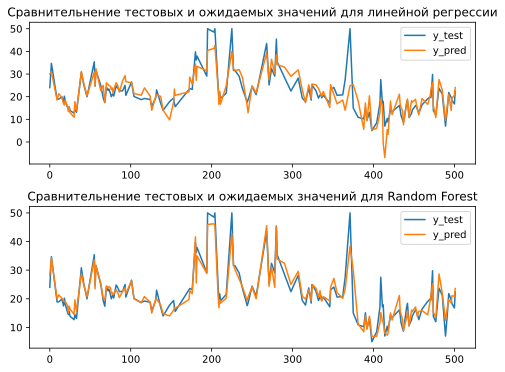

In [16]:
rfc_sort_check_test = check_test.sort_index()

fig, axes = plt.subplots(2, 1)
fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for ax, sort_check_test  in zip(axes.flatten(), [lr_sort_check_test, rfc_sort_check_test]):
    ax.plot(sort_check_test.y_test, label='y_test')
    ax.plot(sort_check_test.y_pred, label='y_pred')
    ax.legend()
axes[0].set(title='Сравнительнение тестовых и ожидаемых значений для линейной регрессии')
axes[1].set(title='Сравнительнение тестовых и ожидаемых значений для Random Forest');